# 2D Computer Vision - Abgabe 1

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io



# 1. Aufgabe

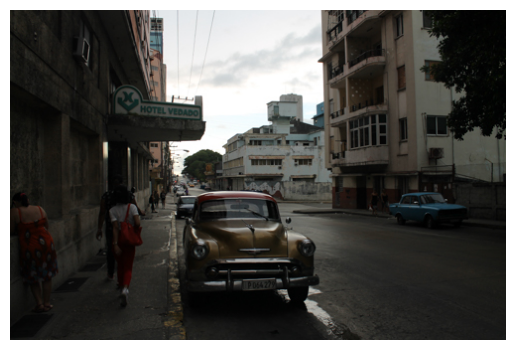

Datentyp des Bildes: <class 'numpy.ndarray'>
Ausgabe des Numpy Arrays: [[[34 29 25]
  [28 28 20]
  [25 24 20]
  ...
  [ 3  3  3]
  [ 3  3  3]
  [ 4  4  4]]

 [[33 30 25]
  [24 25 17]
  [22 23 18]
  ...
  [ 3  3  3]
  [ 2  2  2]
  [ 3  3  3]]

 [[33 30 25]
  [26 26 18]
  [23 22 18]
  ...
  [ 2  4  3]
  [ 2  4  3]
  [ 2  4  3]]

 ...

 [[ 8  8  8]
  [ 8  8  8]
  [ 9  9  9]
  ...
  [27 27 27]
  [24 24 24]
  [24 24 24]]

 [[16 16 14]
  [16 16 14]
  [16 16 16]
  ...
  [25 27 26]
  [26 26 26]
  [28 28 28]]

 [[22 22 20]
  [22 22 20]
  [22 22 20]
  ...
  [26 28 25]
  [25 27 26]
  [25 27 26]]]


In [29]:
image = io.imread('bild01.jpg')
plt.imshow(image)
plt.axis('off') 
plt.show()

print(f"Datentyp des Bildes: {type(image)}")
print(f"Ausgabe des Numpy Arrays: {image}")


3. Wie ist ein Numpy Array aufgebaut? 
- Array in Array, die jeweils 3 Werte beinhalten
- die Werte stehen für RGB und legen den Wert des Pixels fest

4. Farbkanäle

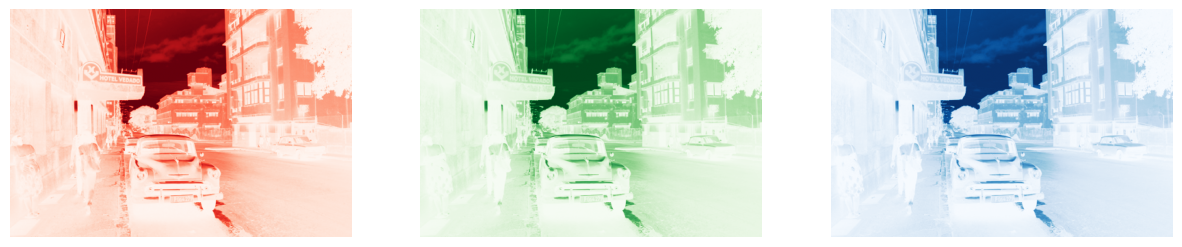

In [30]:
red, green, blue = cv2.split(image)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(red, cmap="Reds")
axs[1].imshow(green, cmap="Greens")
axs[2].imshow(blue, cmap="Blues")

for ax in axs:
    ax.axis("off")

plt.show()

5. Horizontale Spiegelung

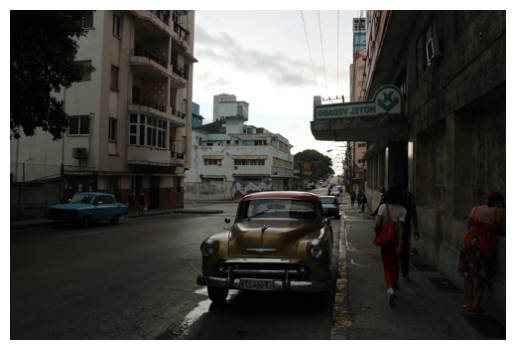

In [31]:
horizontal_img = [list(reversed(row)) for row in image]
plt.imshow(horizontal_img)
plt.axis('off') 
plt.show()



# 2. Aufgabe
2. Bilder einlesen

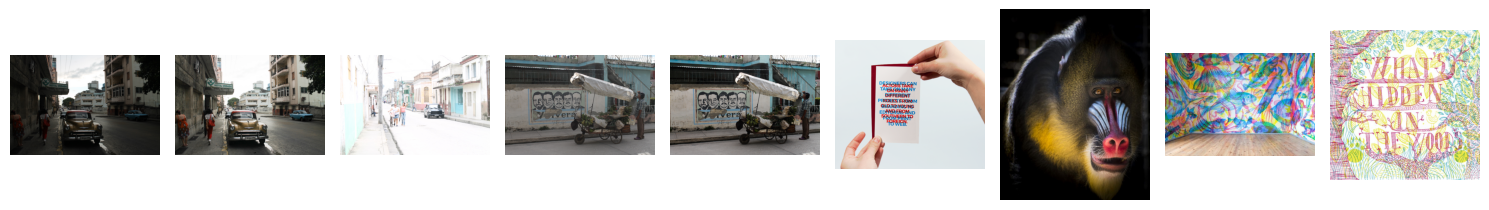

In [71]:
images = []
for file in os.listdir('.'):
    if file.endswith(('.jpg', '.png')):
        img = io.imread(file)
        images.append(img)

fig, axs = plt.subplots(1, len(images), figsize=(15, 5))

for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

3. Histogramm für ein Bild berechnen

In [72]:
#Implementierung mit cv2

test_image = images[7]

gray_img = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#plt.imshow(gray_img, cmap='gray')
#plt.axis('off')
#plt.show()

histogram = cv2.calcHist([gray_img],[0],None,[256],[0,256])

#plt.bar(range(256), histogram.flatten())
#plt.title("Histogramm")
#plt.xlabel("Intensitätswert i")
#plt.ylabel("Pixelanzahl h(i)")
#plt.show()

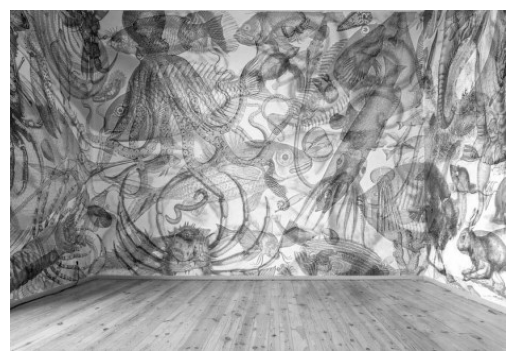

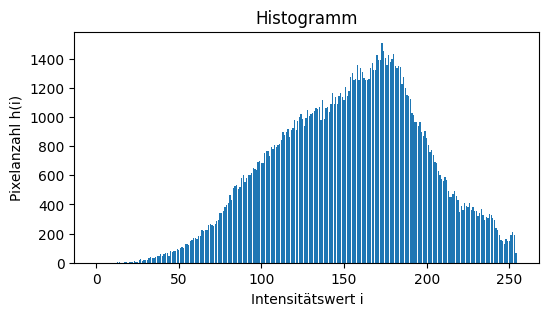

In [73]:
#Eigene Implementierung

def gray_converter(image):
     gray_image = 0.2989 * image[:, :, 2] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 0]
     return gray_image

def computeHisto(gray_image):
     hist = np.zeros(256, dtype=int)
     for pixel in gray_image.flatten():
        hist[int(pixel)] += 1
     return hist

converted_img = gray_converter(test_image)
histo = computeHisto(converted_img)

plt.imshow(converted_img, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 3))
plt.bar(range(256), histo.flatten())
plt.title("Histogramm")
plt.xlabel("Intensitätswert i")
plt.ylabel("Pixelanzahl h(i)")
plt.show()

4. Histogramm für alle Bilder

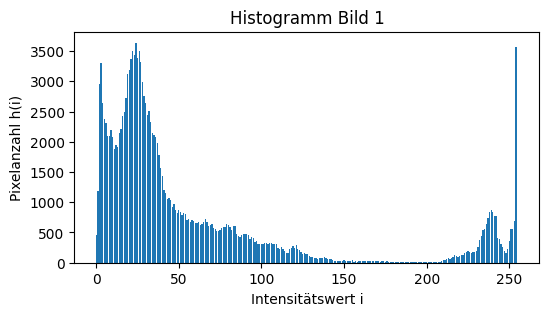

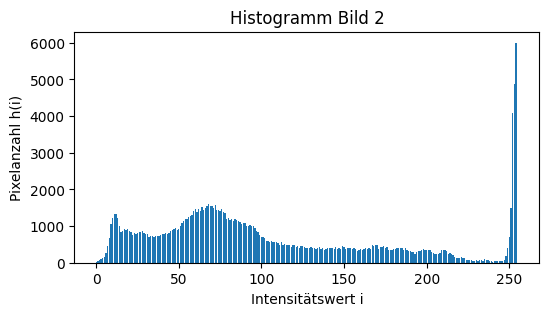

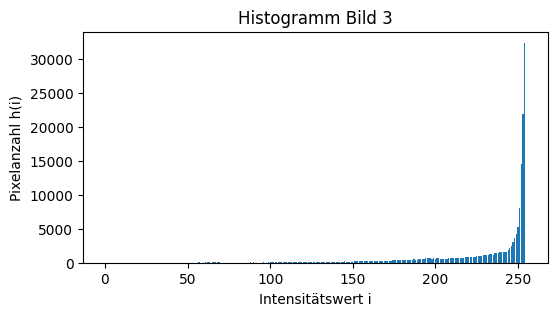

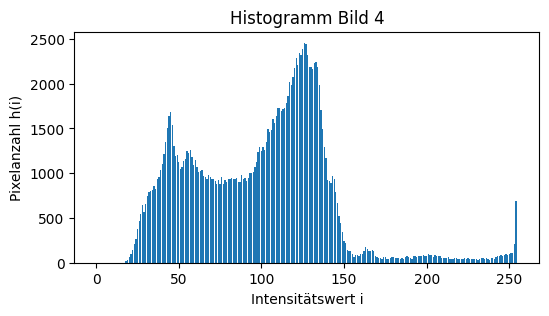

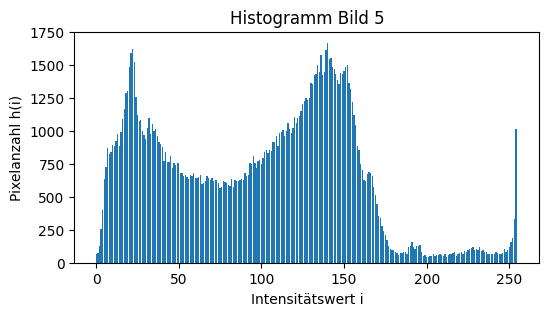

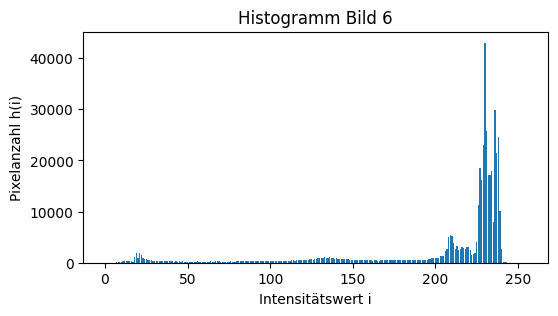

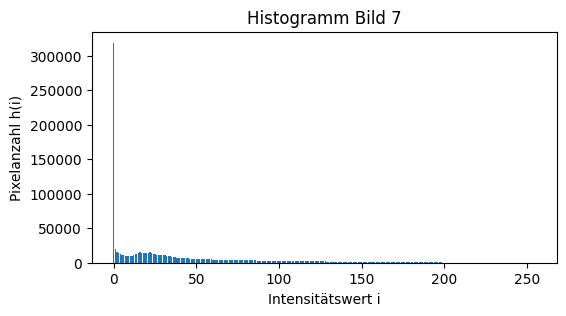

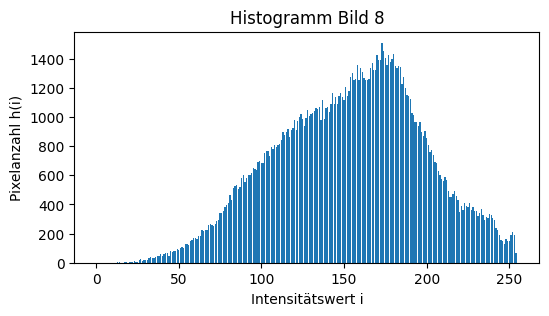

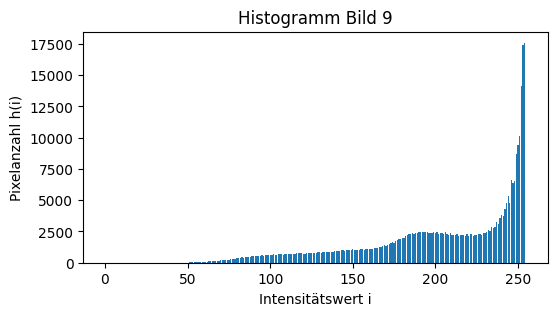

In [74]:
for i, img in enumerate(images):
    gray_image =  gray_converter(img)
    histo = computeHisto(gray_image)
    
    plt.figure(figsize=(6, 3))
    plt.bar(range(256), histo)
    plt.title(f"Histogramm Bild {i+1}")
    plt.xlabel("Intensitätswert i")
    plt.ylabel("Pixelanzahl h(i)")
    
    plt.show()


a) Welche Aufnahmefehler sind in 01 und 03 zu erkennen? Woran ist dies im Histogramm erkennbar?

Bild 1:
- keine gleichmäßige, ideale Verteilung
- starke Peaks an Grenzwerten --> Belichtungsfehler (Unter- und Überlichtung
    --> Sättigungseffekt 
- Hohe Differenz zwischen max Intensitätswert und min Intensitätswert --> hoher Kontrast
- nicht alle Intensitätswerte kommen vor, es gibt Lücken --> keine volle Dynamik

Bild 3:
- Werte (Peaks) weit rechts, helle Farbwerte --> Überbelichtung (viele Werte bei 255)
- keine schwarz Werte, mehr weiß Werte --> niedriger Kontrast
- Intensitätswerte zwischen 60 und 256 --> niedrige Dynamik 

b) Bild01 ist das aufgenommene Bild. Bild02 wurde nachbearbeitet. Die Helligkeit wurde erhöht. Woran ist dies im Histogramm erkennbar? Welche Daten gehen dabei verloren?

- Helligkeit erhöhen heißt jeden Pixel mit einem Helligkeitswert zu addieren --> Verschiebung der Balken nach rechts, weil die Intensitätswerte höher werden (die Häufung der Werte links werden nach rechts ausgeglichen)
- viele Pixel, die eigentlich über 255 liegen würden (z. B. 260), wurden auf 255 abgeschnitten
--> Bild verliert Details im hellen Bereich 
- kein idealer Kontrast 


c) Bild04 ist das aufgenommene Bild. Bild05 wurde einem Bearbeitungsschritt unterzogen. Was wurde in Bild05 verändert? Woran kann man dies in seinem Histogramm erkennen?
- Kontrasterhöhung?
--> größere Spannweite, also Werteverteilung in die Breite
--> Peaks wurden erhalten, teilweise erhöht

5. Punktoperation mithilfe einer Lookup-Tabelle 

a) In Aufgabe (4b) gingen Daten beim Aufhellen eines Bildes verloren. Wie konnte dies vermieden werden?
- indem man sicherstellt, dass der Helligkeitswert eines Pixels nicht über den maximalen Wert hinausgeht (also 0 - 255)

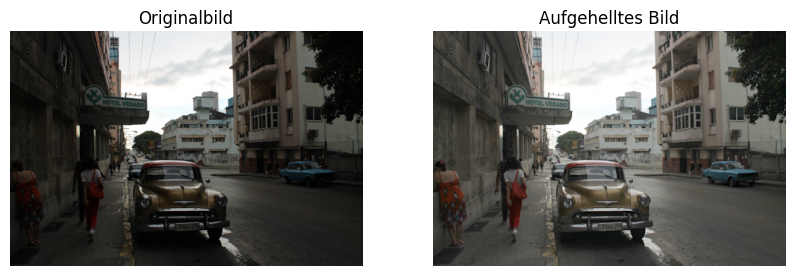

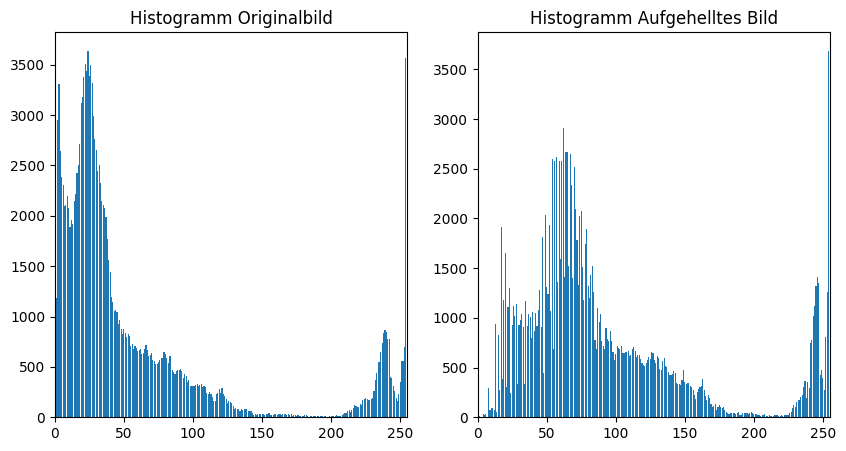

In [123]:
def lookup_table(gamma, K=256):
    aMax = K - 1
    
    lut = np.zeros(K, dtype=np.uint8)
    
    for a in range(K):
        aa = a / aMax #scale [0,1]
        bb = np.power(aa, gamma) #gamma function
        b = np.round(bb * aMax).astype(np.uint8) #scale back [0,255]
        lut[a] = b
    return lut

def apply_lut(image, lut):
    return cv2.LUT(image, lut)

gamma = 0.6

lut = lookup_table(gamma)
brightened_image = apply_lut(images[0], lut)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Originalbild')
plt.imshow(images[0], cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Aufgehelltes Bild')
plt.imshow(brightened_image, cmap='gray')
plt.axis('off')

gray_image = gray_converter(images[0])
histo = computeHisto(gray_image)

gray_brightened_image = gray_converter(brightened_image)
histo_brightened = computeHisto(gray_brightened_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Histogramm Originalbild')
plt.bar(np.arange(256), histo)
plt.xlim(0, 255)

plt.subplot(1, 2, 2)
plt.title('Histogramm Aufgehelltes Bild')
plt.bar(np.arange(256), histo_brightened)
plt.xlim(0, 255)

plt.show()